<a href="https://colab.research.google.com/github/Buuuuli/AIPI530/blob/main/Final_takehome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PROJ ="My Drive/repos"
PROJECT_PATH = join(ROOT, PROJ)
!mkdir "PROJECT_PATH"

mkdir: cannot create directory ‘PROJECT_PATH’: File exists


In [ ]:
!ls

d3rlpy	d3rlpy_data  d3rlpy_logs  PROJECT_PATH


In [ ]:
%cd /content/drive/"My Drive"/repos

/content/drive/My Drive/repos


In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!pip install d3rlpy

In [ ]:
!pip install git+https://github.com/takuseno/d4rl-pybullet

  Cloning https://github.com/takuseno/d4rl-pybullet to /tmp/pip-req-build-d85_942q
  Running command git clone -q https://github.com/takuseno/d4rl-pybullet /tmp/pip-req-build-d85_942q


In [ ]:
from d3rlpy.algos import CQL
#from d3rlpy.datasets import get_cartpole
from d3rlpy.metrics.scorer import evaluate_on_environment
from d3rlpy.metrics.scorer import initial_state_value_estimation_scorer
from d3rlpy.metrics.scorer import discounted_sum_of_advantage_scorer
from d3rlpy.metrics.scorer import average_value_estimation_scorer
from sklearn.model_selection import train_test_split
from d3rlpy.models.q_functions import MeanQFunctionFactory
from d3rlpy.models.encoders import DefaultEncoderFactory
from d3rlpy.datasets import get_pybullet

In [ ]:
encoder = DefaultEncoderFactory(use_batch_norm=True)

In [ ]:
dataset, env = get_pybullet('hopper-bullet-mixed-v0')

In [ ]:
train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

In [ ]:
cql = CQL(actor_learning_rate=0.0001,
                  critic_learning_rate=0.0002,
                  temp_learning_rate=0.0001,
                  actor_encoder_factory=encoder,
                  critic_encoder_factory=encoder,
                  use_gpu=False)

cql.build_with_dataset(dataset)

In [ ]:
cql.fit(train_episodes,
            eval_episodes=test_episodes,
            n_epochs=10,
            scorers={
                'environment': evaluate_on_environment(env, epsilon=0.05),
                'estimated': initial_state_value_estimation_scorer,
                'True': discounted_sum_of_advantage_scorer
            },
        logdir=PROJECT_PATH)


2021-12-05 19:02.00 [debug    ] RoundIterator is selected.
2021-12-05 19:02.00 [info     ] Directory is created at /content/drive/My Drive/repos/CQL_20211205190200
2021-12-05 19:02.00 [warning  ] Skip building models since they're already built.
2021-12-05 19:02.00 [info     ] Parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/params.json params={'action_scaler': None, 'actor_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': True, 'dropout_rate': None}}, 'actor_learning_rate': 0.0001, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'alpha_learning_rate': 0.0001, 'alpha_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'alpha_threshold': 10.0, 'batch_size': 256, 'conservative_weight': 5.0, 'critic_encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': True, 'dr

Epoch 1/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:03.18 [info     ] CQL_20211205190200: epoch=1 step=180 epoch=1 metrics={'time_sample_batch': 0.0011589368184407552, 'time_algorithm_update': 0.4144834690623813, 'temp_loss': 4.684373327096304, 'temp': 0.9906159023443858, 'alpha_loss': -17.812216578589545, 'alpha': 1.0091983331574335, 'critic_loss': 20.08991060256958, 'actor_loss': -1.8373111297893856, 'time_step': 0.41582266092300413, 'environment': 31.27193999873838, 'estimated': 0.13887540996074677, 'True': 2.2550842653358583} step=180
2021-12-05 19:03.18 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_180.pt


Epoch 2/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:04.34 [info     ] CQL_20211205190200: epoch=2 step=360 epoch=2 metrics={'time_sample_batch': 0.0011288311746385363, 'time_algorithm_update': 0.41188960737652247, 'temp_loss': 4.810175710254246, 'temp': 0.9724533418814342, 'alpha_loss': -18.19011362923516, 'alpha': 1.0277282052569918, 'critic_loss': 19.51217886606852, 'actor_loss': -2.4218646460109285, 'time_step': 0.4131949345270793, 'environment': 28.070193026546622, 'estimated': 1.0196675062179565, 'True': -2.3600577335792225} step=360
2021-12-05 19:04.34 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_360.pt


Epoch 3/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:05.50 [info     ] CQL_20211205190200: epoch=3 step=540 epoch=3 metrics={'time_sample_batch': 0.0011739320225185818, 'time_algorithm_update': 0.4157436384095086, 'temp_loss': 4.726569602224562, 'temp': 0.9550266053941515, 'alpha_loss': -18.770199659135606, 'alpha': 1.046811788611942, 'critic_loss': 19.293914720747207, 'actor_loss': -3.05562091006173, 'time_step': 0.41710018979178537, 'environment': 26.408941892173168, 'estimated': 2.423748254776001, 'True': -10.57001022529569} step=540
2021-12-05 19:05.50 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_540.pt


Epoch 4/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:07.06 [info     ] CQL_20211205190200: epoch=4 step=720 epoch=4 metrics={'time_sample_batch': 0.0011735479036966959, 'time_algorithm_update': 0.41088331672880385, 'temp_loss': 4.602382871839735, 'temp': 0.9382434884707133, 'alpha_loss': -19.50399856567383, 'alpha': 1.0666080269548628, 'critic_loss': 19.695433976915147, 'actor_loss': -3.6606420397758486, 'time_step': 0.41223313013712565, 'environment': 24.936764287911938, 'estimated': 3.915945053100586, 'True': -19.505924502188854} step=720
2021-12-05 19:07.06 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_720.pt


Epoch 5/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:08.22 [info     ] CQL_20211205190200: epoch=5 step=900 epoch=5 metrics={'time_sample_batch': 0.00114925569958157, 'time_algorithm_update': 0.41235039366616144, 'temp_loss': 4.451690649986267, 'temp': 0.9220869110690223, 'alpha_loss': -20.09238068262736, 'alpha': 1.0870941234959497, 'critic_loss': 20.122521018981935, 'actor_loss': -4.215593494309319, 'time_step': 0.4136782924334208, 'environment': 24.28885748036948, 'estimated': 4.887335300445557, 'True': -29.881850749940966} step=900
2021-12-05 19:08.22 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_900.pt


Epoch 6/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:09.38 [info     ] CQL_20211205190200: epoch=6 step=1080 epoch=6 metrics={'time_sample_batch': 0.0011354459656609428, 'time_algorithm_update': 0.41082696782218087, 'temp_loss': 4.311277548472087, 'temp': 0.9064939846595128, 'alpha_loss': -20.634533627827963, 'alpha': 1.1081074582205879, 'critic_loss': 20.54006045659383, 'actor_loss': -4.7792306608623925, 'time_step': 0.41214821603563095, 'environment': 22.219158953575537, 'estimated': 7.055192470550537, 'True': -42.22093941497688} step=1080
2021-12-05 19:09.38 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_1080.pt


Epoch 7/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:10.53 [info     ] CQL_20211205190200: epoch=7 step=1260 epoch=7 metrics={'time_sample_batch': 0.0011523630883958605, 'time_algorithm_update': 0.4081540240181817, 'temp_loss': 4.194697750939263, 'temp': 0.8913701779312557, 'alpha_loss': -21.395311080084905, 'alpha': 1.129772553841273, 'critic_loss': 20.945080290900336, 'actor_loss': -5.3580962551964655, 'time_step': 0.40947642458809747, 'environment': 22.02453214221765, 'estimated': 7.482561111450195, 'True': -45.604238984200535} step=1260
2021-12-05 19:10.53 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_1260.pt


Epoch 8/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:12.09 [info     ] CQL_20211205190200: epoch=8 step=1440 epoch=8 metrics={'time_sample_batch': 0.0011313398679097494, 'time_algorithm_update': 0.4120286266009013, 'temp_loss': 4.098757023281522, 'temp': 0.8766195151540969, 'alpha_loss': -21.665465535057916, 'alpha': 1.1519317666689555, 'critic_loss': 21.44077066845364, 'actor_loss': -5.921286662419637, 'time_step': 0.41333289411332874, 'environment': 23.746135001942314, 'estimated': 7.550510406494141, 'True': -41.94368883090155} step=1440
2021-12-05 19:12.09 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_1440.pt


Epoch 9/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:13.25 [info     ] CQL_20211205190200: epoch=9 step=1620 epoch=9 metrics={'time_sample_batch': 0.0011253224478827582, 'time_algorithm_update': 0.41029684278700085, 'temp_loss': 4.023127077685462, 'temp': 0.8621358182695177, 'alpha_loss': -22.247284179263644, 'alpha': 1.1744824197557238, 'critic_loss': 21.945311239030627, 'actor_loss': -6.525552821159363, 'time_step': 0.4115917947557237, 'environment': 22.91839669107387, 'estimated': 9.660667419433594, 'True': -47.60017533119746} step=1620
2021-12-05 19:13.25 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_1620.pt


Epoch 10/10:   0%|          | 0/180 [00:00<?, ?it/s]

2021-12-05 19:14.42 [info     ] CQL_20211205190200: epoch=10 step=1800 epoch=10 metrics={'time_sample_batch': 0.0011523061328464084, 'time_algorithm_update': 0.4161587701903449, 'temp_loss': 3.9382176531685724, 'temp': 0.8479579160610835, 'alpha_loss': -22.595998583899604, 'alpha': 1.1975571248266432, 'critic_loss': 22.365018632676865, 'actor_loss': -7.114046300782098, 'time_step': 0.4174855417675442, 'environment': 23.793517162513744, 'estimated': 10.149831771850586, 'True': -40.59379212325155} step=1800
2021-12-05 19:14.42 [info     ] Model parameters are saved to /content/drive/My Drive/repos/CQL_20211205190200/model_1800.pt


[(1,
  {'True': 2.2550842653358583,
   'actor_loss': -1.8373111297893856,
   'alpha': 1.0091983331574335,
   'alpha_loss': -17.812216578589545,
   'critic_loss': 20.08991060256958,
   'environment': 31.27193999873838,
   'estimated': 0.13887540996074677,
   'temp': 0.9906159023443858,
   'temp_loss': 4.684373327096304,
   'time_algorithm_update': 0.4144834690623813,
   'time_sample_batch': 0.0011589368184407552,
   'time_step': 0.41582266092300413}),
 (2,
  {'True': -2.3600577335792225,
   'actor_loss': -2.4218646460109285,
   'alpha': 1.0277282052569918,
   'alpha_loss': -18.19011362923516,
   'critic_loss': 19.51217886606852,
   'environment': 28.070193026546622,
   'estimated': 1.0196675062179565,
   'temp': 0.9724533418814342,
   'temp_loss': 4.810175710254246,
   'time_algorithm_update': 0.41188960737652247,
   'time_sample_batch': 0.0011288311746385363,
   'time_step': 0.4131949345270793}),
 (3,
  {'True': -10.57001022529569,
   'actor_loss': -3.05562091006173,
   'alpha': 1.0468

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cql_env_file = pd.read_csv('CQL_20211205190200/environment.csv', header=None)
cql_env_file

,0,1,2
0,1,180,31.271940
1,2,360,28.070193
2,3,540,26.408942
3,4,720,24.936764
4,5,900,24.288857
5,6,1080,22.219159
6,7,1260,22.024532
7,8,1440,23.746135
8,9,1620,22.918397
9,10,1800,23.793517


In [ ]:
cql_env_file.columns = ['episode', 'Time_step', 'reward']

In [ ]:
cql_env_file

,episode,Time_step,reward
0,1,180,31.271940
1,2,360,28.070193
2,3,540,26.408942
3,4,720,24.936764
4,5,900,24.288857
5,6,1080,22.219159
6,7,1260,22.024532
7,8,1440,23.746135
8,9,1620,22.918397
9,10,1800,23.793517


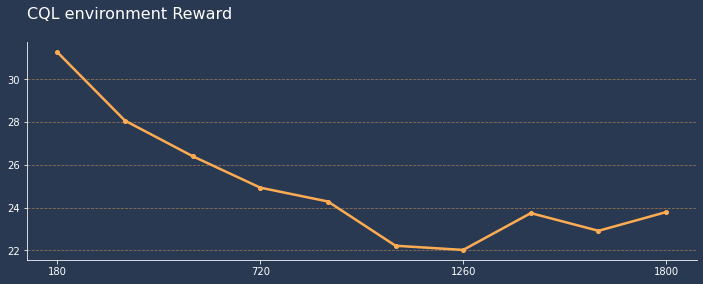

In [ ]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='#293952')
ax.set_facecolor('#293952')
# data
reward = cql_env_file['reward']
# plot
plt.plot(cql_env_file.Time_step, reward, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
# ticks n title
ax.tick_params(axis='both', colors='w')
plt.xticks(cql_env_file.Time_step[::3])
plt.title('CQL environment Reward\n', loc='left', color='w', fontsize=16)
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FDAC53', linestyle='dashed', alpha=0.5)
plt.show()

In [ ]:
cql_est_file = pd.read_csv('CQL_20211205190200/estimated.csv', header=None)
cql_est_file.columns = ['episode', 'Time_step', 'estimate_Q']

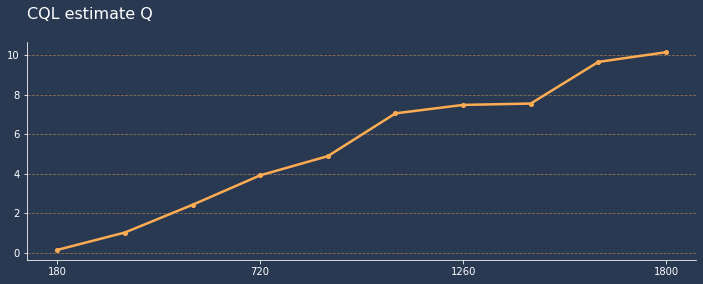

In [ ]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='#293952')
ax.set_facecolor('#293952')
# data
estimate = cql_est_file['estimate_Q']
# plot
plt.plot(cql_est_file.Time_step, estimate, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
# ticks n title
ax.tick_params(axis='both', colors='w')
plt.xticks(cql_est_file.Time_step[::3])
plt.title('CQL estimate Q\n', loc='left', color='w', fontsize=16)
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FDAC53', linestyle='dashed', alpha=0.5)
plt.show()

In [ ]:
cql_true_file = pd.read_csv('CQL_20211205190200/True.csv', header=None)
cql_true_file.columns = ['episode', 'Time_step', 'true_Q']

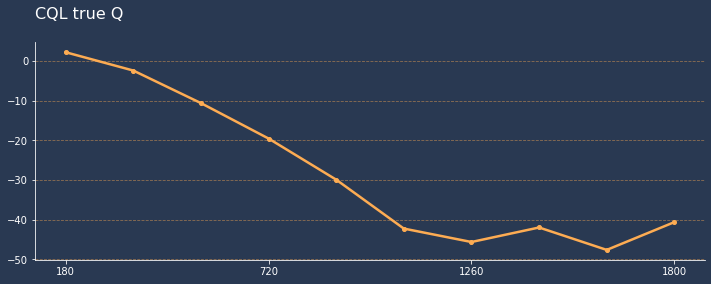

In [ ]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='#293952')
ax.set_facecolor('#293952')
# data
true_Q = cql_true_file['true_Q']
# plot
plt.plot(cql_true_file.Time_step, true_Q, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
# ticks n title
ax.tick_params(axis='both', colors='w')
plt.xticks(cql_true_file.Time_step[::3])
plt.title('CQL true Q\n', loc='left', color='w', fontsize=16)
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FDAC53', linestyle='dashed', alpha=0.5)
plt.show()

In [ ]:
from d3rlpy.ope import FQE

In [ ]:
fqe = FQE(algo=cql,
          q_func_factory='qr',
          learning_rate=0.0001)

In [ ]:
fqe.fit(dataset.episodes,
        eval_episodes=dataset.episodes,
        n_epochs=10,
        scorers={
           'estimated': initial_state_value_estimation_scorer,
            'True': discounted_sum_of_advantage_scorer
        },
        logdir=PROJECT_PATH)

2021-12-05 19:15.06 [debug    ] RoundIterator is selected.
2021-12-05 19:15.06 [info     ] Directory is created at /content/drive/My Drive/repos/FQE_20211205191506
2021-12-05 19:15.06 [debug    ] Building models...
2021-12-05 19:15.06 [debug    ] Models have been built.
2021-12-05 19:15.06 [info     ] Parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/params.json params={'action_scaler': None, 'batch_size': 100, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'qr', 'params': {'bootstrap': False, 'share_encoder': False, 'n_quantiles': 32}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 100, 'use_gpu': None,

Epoch 1/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:15.16 [info     ] FQE_20211205191506: epoch=1 step=587 epoch=1 metrics={'time_sample_batch': 0.0004359887852579406, 'time_algorithm_update': 0.010386830903399336, 'loss': 7.445927587847084, 'time_step': 0.010961784414782029, 'estimated': 8.639588356018066, 'True': -39.16678626032058} step=587
2021-12-05 19:15.16 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_587.pt


Epoch 2/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:15.26 [info     ] FQE_20211205191506: epoch=2 step=1174 epoch=2 metrics={'time_sample_batch': 0.0004402234566475707, 'time_algorithm_update': 0.010575518291284927, 'loss': 23.627248748603833, 'time_step': 0.01114963226058414, 'estimated': 20.041017532348633, 'True': -82.10077878143059} step=1174
2021-12-05 19:15.26 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_1174.pt


Epoch 3/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:15.36 [info     ] FQE_20211205191506: epoch=3 step=1761 epoch=3 metrics={'time_sample_batch': 0.00044577003946905444, 'time_algorithm_update': 0.010792348413288695, 'loss': 46.491946059556795, 'time_step': 0.011387756370401464, 'estimated': 30.363361358642578, 'True': -53.95168467611373} step=1761
2021-12-05 19:15.36 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_1761.pt


Epoch 4/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:15.46 [info     ] FQE_20211205191506: epoch=4 step=2348 epoch=4 metrics={'time_sample_batch': 0.0004298666672974673, 'time_algorithm_update': 0.010377465561666927, 'loss': 61.09649157808424, 'time_step': 0.010947923237867209, 'estimated': 39.70328140258789, 'True': 3.0438279805651574} step=2348
2021-12-05 19:15.46 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_2348.pt


Epoch 5/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:15.56 [info     ] FQE_20211205191506: epoch=5 step=2935 epoch=5 metrics={'time_sample_batch': 0.00043556556181769556, 'time_algorithm_update': 0.010457583952193771, 'loss': 78.89498041598111, 'time_step': 0.011038914652861768, 'estimated': 47.637271881103516, 'True': 53.22957672360411} step=2935
2021-12-05 19:15.56 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_2935.pt


Epoch 6/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:16.06 [info     ] FQE_20211205191506: epoch=6 step=3522 epoch=6 metrics={'time_sample_batch': 0.0004420974997889244, 'time_algorithm_update': 0.01037060056878111, 'loss': 105.43135328146627, 'time_step': 0.01094651506544175, 'estimated': 54.17461013793945, 'True': 71.96745403323293} step=3522
2021-12-05 19:16.06 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_3522.pt


Epoch 7/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:16.16 [info     ] FQE_20211205191506: epoch=7 step=4109 epoch=7 metrics={'time_sample_batch': 0.0004261214241664698, 'time_algorithm_update': 0.010337590765100118, 'loss': 133.01281844858823, 'time_step': 0.010863889015106773, 'estimated': 57.97422409057617, 'True': 87.11591687612649} step=4109
2021-12-05 19:16.16 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_4109.pt


Epoch 8/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:16.26 [info     ] FQE_20211205191506: epoch=8 step=4696 epoch=8 metrics={'time_sample_batch': 0.0004288094210259147, 'time_algorithm_update': 0.010342210480464175, 'loss': 149.96984501957283, 'time_step': 0.01085887288316145, 'estimated': 59.268165588378906, 'True': 97.5114597237191} step=4696
2021-12-05 19:16.26 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_4696.pt


Epoch 9/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:16.36 [info     ] FQE_20211205191506: epoch=9 step=5283 epoch=9 metrics={'time_sample_batch': 0.00043112943282119255, 'time_algorithm_update': 0.010193351180224443, 'loss': 145.33001602406802, 'time_step': 0.01071532621497393, 'estimated': 55.09542465209961, 'True': 121.0366854210241} step=5283
2021-12-05 19:16.36 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_5283.pt


Epoch 10/10:   0%|          | 0/587 [00:00<?, ?it/s]

2021-12-05 19:16.46 [info     ] FQE_20211205191506: epoch=10 step=5870 epoch=10 metrics={'time_sample_batch': 0.0004573087676014161, 'time_algorithm_update': 0.01058165624966207, 'loss': 118.70845231896162, 'time_step': 0.011145928852399732, 'estimated': 44.16008377075195, 'True': 116.41868723735489} step=5870
2021-12-05 19:16.46 [info     ] Model parameters are saved to /content/drive/My Drive/repos/FQE_20211205191506/model_5870.pt


[(1,
  {'True': -39.16678626032058,
   'estimated': 8.639588356018066,
   'loss': 7.445927587847084,
   'time_algorithm_update': 0.010386830903399336,
   'time_sample_batch': 0.0004359887852579406,
   'time_step': 0.010961784414782029}),
 (2,
  {'True': -82.10077878143059,
   'estimated': 20.041017532348633,
   'loss': 23.627248748603833,
   'time_algorithm_update': 0.010575518291284927,
   'time_sample_batch': 0.0004402234566475707,
   'time_step': 0.01114963226058414}),
 (3,
  {'True': -53.95168467611373,
   'estimated': 30.363361358642578,
   'loss': 46.491946059556795,
   'time_algorithm_update': 0.010792348413288695,
   'time_sample_batch': 0.00044577003946905444,
   'time_step': 0.011387756370401464}),
 (4,
  {'True': 3.0438279805651574,
   'estimated': 39.70328140258789,
   'loss': 61.09649157808424,
   'time_algorithm_update': 0.010377465561666927,
   'time_sample_batch': 0.0004298666672974673,
   'time_step': 0.010947923237867209}),
 (5,
  {'True': 53.22957672360411,
   'estim

In [ ]:
fqe_estimate_file = pd.read_csv('FQE_20211205191506/estimated.csv', header=None)
fqe_true_file = pd.read_csv('FQE_20211205191506/True.csv', header=None)

In [ ]:
fqe_estimate_file.columns = ['episode', 'Time_step', 'estimate_Q']
fqe_true_file.columns = ['episode', 'Time_step', 'true_Q']

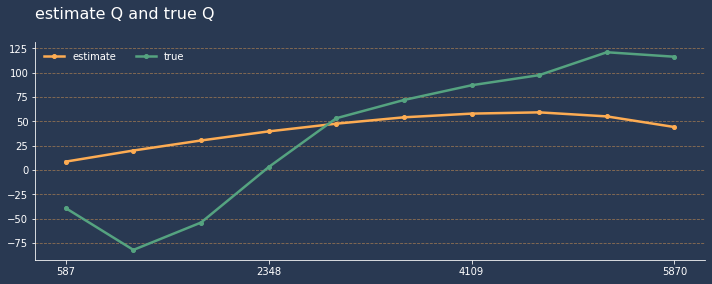

In [ ]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='#293952')
ax.set_facecolor('#293952')
# data
estimate = fqe_estimate_file['estimate_Q']
true = fqe_true_file['true_Q']
# plots
plt.plot(fqe_estimate_file.Time_step, estimate, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
plt.plot(fqe_estimate_file.Time_step, true, marker='o', markersize=4, color='#55A380', linewidth=2.5)
# ticks n title
plt.title('estimate Q and true Q\n', loc='left', color='w', fontsize=16)
ax.tick_params(axis='both', colors='w')
plt.xticks(fqe_estimate_file.Time_step[::3])
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FDAC53', linestyle='dashed', alpha=0.5)
# legend
legend = plt.legend(['estimate', 'true'], frameon=False, ncol=2)
plt.setp(legend.get_texts(), color='w')
plt.show()